In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../input/digit-recognizer/train.csv')
valid=pd.read_csv('../input/digit-recognizer/test.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
valid.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(data)

42000

In [5]:
test = data.iloc[33600:, :]
train = data.iloc[:33600, :]

In [6]:
train_x=train.drop('label', axis=1).to_numpy()/255.0
train_x=train_x.reshape(-1,28,28,1)
train_y=train['label'].to_numpy()

test_x=test.drop('label',axis=1).to_numpy()/255.0
test_x=test_x.reshape(-1,28,28,1)
test_y=test['label'].to_numpy()

valid_x=valid.to_numpy()/255.0
valid_x=valid_x.reshape(-1,28,28,1)


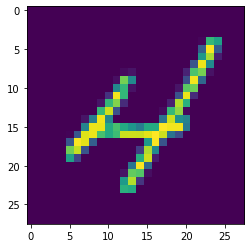

4


In [16]:

plt.imshow(train_x[700].reshape(28,28))
plt.show()
print(train_y[700])

In [7]:
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)
print(valid_x.shape)

(33600, 28, 28, 1) (33600,)
(8400, 28, 28, 1) (8400,)
(28000, 28, 28, 1)


In [17]:
train_datagen = ImageDataGenerator(rescale=1.0,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0)

In [18]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [19]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(train_datagen.flow(train_x, train_y, batch_size=64),
                              steps_per_epoch=len(train_x) / 64,
                              epochs=30,
                              validation_data=validation_datagen.flow(test_x, test_y, batch_size=64),
                              validation_steps=len(test_x) / 64
                             )



Train for 525.0 steps, validate for 131.25 steps
Epoch 1/30
525/525 [==============================] - 12s 23ms/step - loss: 1.4134 - accuracy: 0.5103 - val_loss: 0.6258 - val_accuracy: 0.8062
Epoch 2/30
525/525 [==============================] - 13s 24ms/step - loss: 0.9731 - accuracy: 0.6701 - val_loss: 0.4193 - val_accuracy: 0.8763
Epoch 3/30
525/525 [==============================] - 12s 24ms/step - loss: 0.8029 - accuracy: 0.7351 - val_loss: 0.3264 - val_accuracy: 0.9032
Epoch 4/30
525/525 [==============================] - 12s 23ms/step - loss: 0.6825 - accuracy: 0.7776 - val_loss: 0.3248 - val_accuracy: 0.9014
Epoch 5/30
525/525 [==============================] - 12s 23ms/step - loss: 0.6160 - accuracy: 0.7979 - val_loss: 0.2240 - val_accuracy: 0.9314
Epoch 6/30
525/525 [==============================] - 12s 24ms/step - loss: 0.5672 - accuracy: 0.8128 - val_loss: 0.2574 - val_accuracy: 0.9223
Epoch 7/30
525/525 [==============================] - 13s 24ms/step - loss: 0.5327 - ac

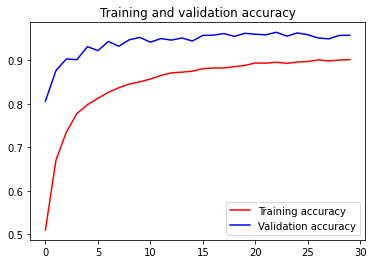

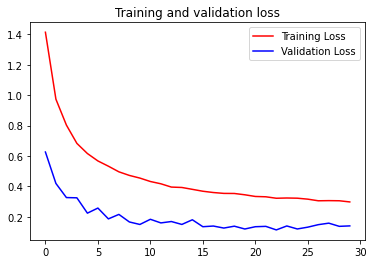

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
predictions=model.predict(valid_x)

In [32]:
predictions[0]

array([3.3791190e-09, 2.6779563e-09, 9.9920756e-01, 5.5262679e-04,
       1.0032142e-07, 8.7936125e-05, 1.1002525e-04, 1.6497044e-05,
       2.4065124e-05, 1.3561616e-06], dtype=float32)

In [33]:
result=np.argmax(predictions,axis=1)
result

array([2, 0, 9, ..., 3, 9, 2])

In [35]:
result_df=pd.Series(result,name='Label')
result_df

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result_df],axis = 1)

submission.to_csv("mnist_submission.csv",index=False)